<a href="https://colab.research.google.com/github/Davidportlouis/100daysofcode/blob/master/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torchvision import transforms,datasets
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import torch.nn.functional as F
from helper import plot_batch,train,test,predict

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(mean=(0.5,0.5,0.5),
                       std=(0.5,0.5,0.5))
])

train_images = datasets.CIFAR10("./",train=True,transform=transform,download=True)
test_images = datasets.CIFAR10("./",train=False,transform=transform,download=True)

train_len = len(train_images)
idx = list(range(train_len))
np.random.shuffle(idx)
split = int(np.floor(0.2 * train_len))
valid_idx,train_idx = idx[:split],idx[split:]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(train_images,batch_size=20,sampler=train_sampler)
valid_loader = DataLoader(train_images,batch_size=20,sampler=valid_sampler)
test_loader = DataLoader(test_images,batch_size=20,shuffle=True)

classes = train_images.classes

Files already downloaded and verified
Files already downloaded and verified


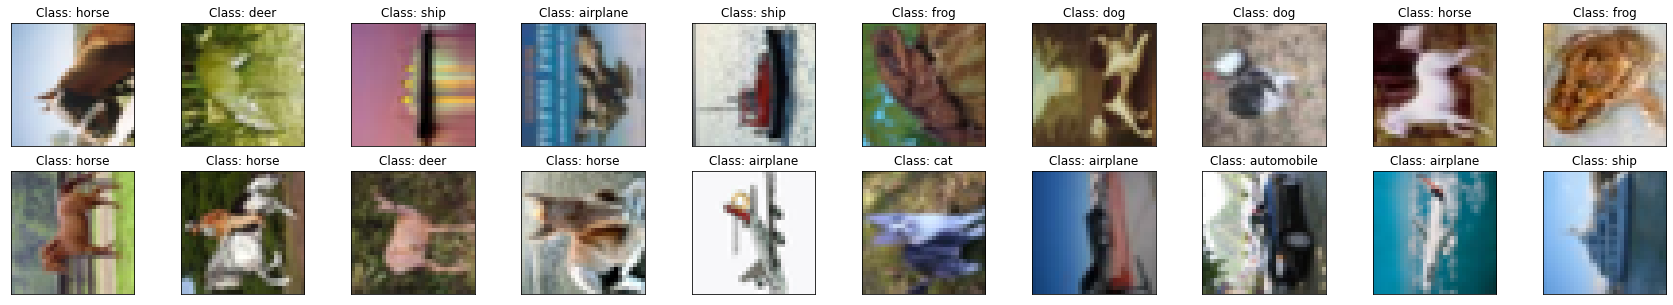

In [4]:
train_images,train_labels = next(iter(train_loader))
plot_batch(train_images,classes,train_labels,normalize=True)

In [60]:
class CifarNet(nn.Module):

  def __init__(self,conv_dim=32):
    super(CifarNet,self).__init__()
    # defining layers
    self.conv_1 = nn.Conv2d(3,conv_dim,3,padding=1)
    self.bnorm_1 = nn.BatchNorm2d(conv_dim)
    self.conv_2 = nn.Conv2d(conv_dim,conv_dim*2,3,padding=1)
    self.bnorm_2 = nn.BatchNorm2d(conv_dim*2)
    self.conv_3 = nn.Conv2d(conv_dim*2,conv_dim*4,3,padding=1)
    self.bnorm_3 = nn.BatchNorm2d(conv_dim*4)
    self.conv_4 = nn.Conv2d(conv_dim*4,conv_dim*8,3,padding=1)
    self.bnorm_4 = nn.BatchNorm2d(conv_dim*8)
    self.maxpool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(2*2*conv_dim*8,700)
    self.fc2 = nn.Linear(700,10)
    self.drop = nn.Dropout(p=0.3)

  def forward(self,x):
    x = self.conv_1(x)
    x = F.relu(self.bnorm_1(x))
    x = self.maxpool(x)
    x = self.conv_2(x)
    x = F.relu(self.bnorm_2(x))
    x = self.maxpool(x)
    x = self.conv_3(x)
    x = F.relu(self.bnorm_3(x))
    x = self.maxpool(x)
    x = self.conv_4(x)
    x = F.relu(self.bnorm_4(x))
    x = self.maxpool(x)
    x = x.view(x.shape[0],-1)
    x = self.drop(x)
    x = F.relu(self.fc1(x))
    x = self.drop(x)
    x = F.log_softmax(self.fc2(x),dim=1)
    return x

model = CifarNet()
model = model.to(device)
print(model)

CifarNet(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bnorm_4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=700, bias=True)
  (fc2): Linear(in_features=700, out_features=10, bias=True)
  (drop): Dropout(p=0.3, inplace=False)
)


In [61]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)
train_loss,valid_loss = train(model,train_loader,valid_loader,optimizer,criterion,10,device)

epoch: 1/10 trainloss: 1.38404 validloss: 1.07491 time: 19.064 sec
Loss decresed: inf -> 1.07491
epoch: 2/10 trainloss: 1.01294 validloss: 0.90465 time: 18.846 sec
Loss decresed: 1.07491 -> 0.90465
epoch: 3/10 trainloss: 0.86591 validloss: 0.82846 time: 18.723 sec
Loss decresed: 0.90465 -> 0.82846
epoch: 4/10 trainloss: 0.76310 validloss: 0.78146 time: 18.756 sec
Loss decresed: 0.82846 -> 0.78146
epoch: 5/10 trainloss: 0.68239 validloss: 0.74065 time: 18.703 sec
Loss decresed: 0.78146 -> 0.74065
epoch: 6/10 trainloss: 0.61781 validloss: 0.73522 time: 18.693 sec
Loss decresed: 0.74065 -> 0.73522
epoch: 7/10 trainloss: 0.55257 validloss: 0.73990 time: 18.503 sec
epoch: 8/10 trainloss: 0.50254 validloss: 0.75025 time: 18.475 sec
epoch: 9/10 trainloss: 0.45609 validloss: 0.73335 time: 18.501 sec
Loss decresed: 0.73522 -> 0.73335
epoch: 10/10 trainloss: 0.41156 validloss: 0.70337 time: 18.844 sec
Loss decresed: 0.73335 -> 0.70337


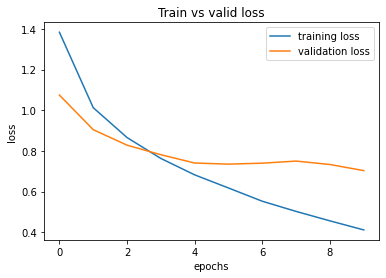

In [62]:
 plt.plot(train_loss,label="training loss")
plt.plot(valid_loss,label="validation loss")
plt.title("Train vs valid loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [63]:
state_dict = torch.load("model_weights.pth")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [64]:
test(model,test_loader,optimizer,criterion,device)

testloss: 0.702859 accuracy: 0.770


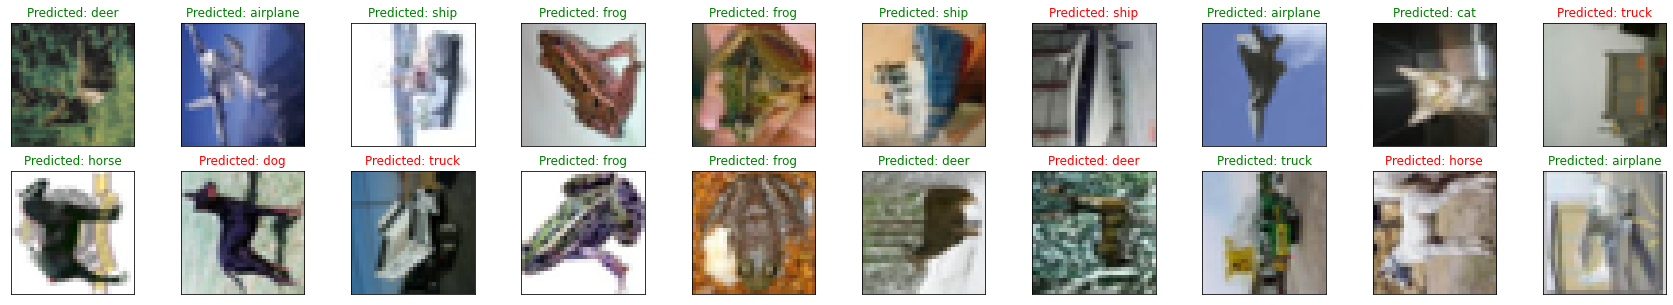

In [65]:
test_images,test_labels = next(iter(test_loader))
predict(test_images,classes,test_labels,model,device)